In [1]:
import pandas as pd

week = []
l =['00','01','02','06','07','08']
for i in l:
    week.append(pd.read_csv('C:/Users/Orestis/Desktop/1.Diplomatiki/Data/Access_Statistics/week'+i+'.txt', header = None, sep = '\t'))


In [2]:
type(week[1])

pandas.core.frame.DataFrame

In [ ]:
week[1]

In [4]:
temp = week[1][1]
type(temp)

pandas.core.series.Series

In [80]:
###kathe bdomada exei 1 fora kathe arthro
l = []
for w in week[2:3]:   #tis 3 prwtes bdomades
    temp = w[1].tolist() 
    l += temp
l2 = set(l)   #sbinei diploeggrafes
len(l),len(l2)   # ara uparxoun diploeggrafes

(22238, 22238)

In [9]:
n = set()
for w in week[3:]:  #apo tin 3 bdomada kai meta
    for i in w[1].tolist():
        if i not in l:
            n.add(i)    #prosthetei to stoixeio sto set() efoson den uparxei
len(n)

9621

In [3]:
## ftiaxnw mia lista pou periexei ola ta impressions olwn twn ebdomadwn
impressions = []
for i,w in enumerate(week[0:]): 
        temp = week[i][2].tolist()
        impressions += temp

## elegxw ean uparxoyn mhdenika stoixeia sthn stili twn impressions...telika den uparxoun
counter = 0
for i in impressions:
    if i == 0:
        counter += 1
counter

0

In [4]:
len(impressions)

137307

In [15]:
from numpy import median, mean
print(median(impressions),mean(impressions))

13.0 531.1865673272303


In [16]:
print('The max value of the impressions is: ', max(impressions))
print('The minimum value of the impressions is: ', min(impressions))

The max value of the impressions is:  843910
The minimum value of the impressions is:  1


In [17]:
type(impressions)

list

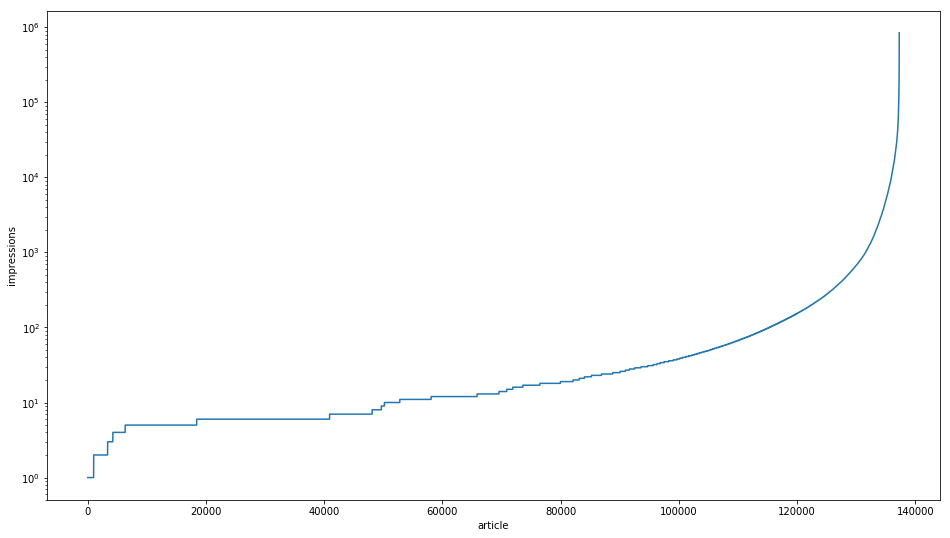

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 9))
plt.plot(sorted(impressions))
plt.yscale('log')
plt.ylabel('impressions')
plt.xlabel('article')
plt.show()

In [7]:
import statistics
print(statistics.median(impressions),statistics.mean(impressions))

13 531.1865673272303


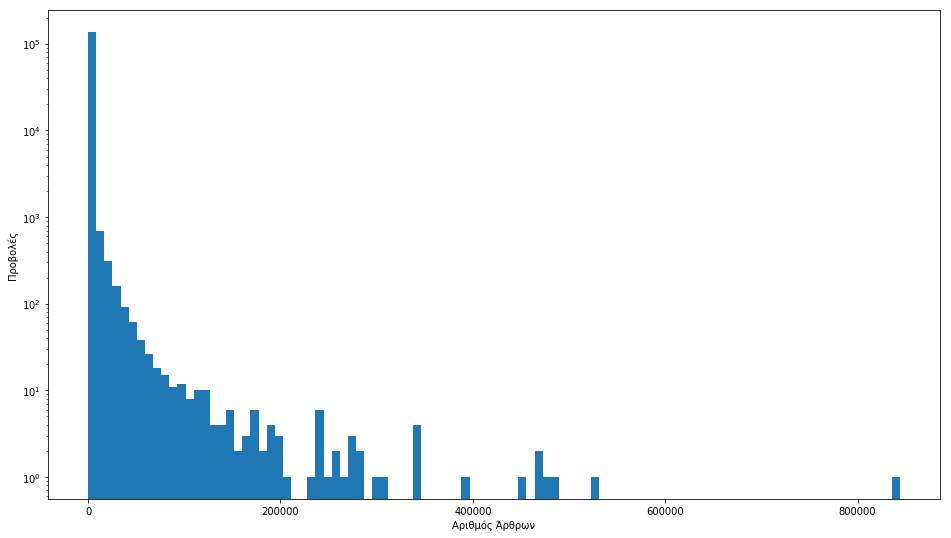

In [9]:
plt.figure(figsize=(16, 9))
plt.hist(impressions, bins=100)
plt.yscale('log')
plt.ylabel('Προβολές')
plt.xlabel('Αριθμός Άρθρων')
plt.show()

In [20]:
over100 = []
for i in impressions:
    if i>100:
        over100.append(i)
print(len(impressions),len(over100))

137307 21961


In [ ]:
### apo ta 137307 impressions olwn twn ebdomadwn, mono ta 21961 exoun timi megaliteri tou 100

In [21]:
from numpy import median, mean
print(median(impressions),mean(impressions))

13.0 531.1865673272303


In [22]:
len(week)

6

In [1]:
### krataw ola ta arthra twn prwtwn 3 ebdomadwn kai prosthetw ola ta impressions gia kathe arthro
training_set = {}

for w in week[:3]:             # for gia tis 3 prwtew ebdomades 3,4,5 (dld 1,2,3 apo to arxiko set) 
    for i,k in zip(w[1],w[2]):     #w[1] exei article id kai w[2] ta impressions
        if i not in training_set:
            training_set[i] = k
        else:
            temp= training_set[i]
            temp = temp + k
            training_set[i] = temp

len(training_set)
    

NameError: name 'week' is not defined

In [23]:
### periexei ta arthra pou einai stis 3 teleutaies ebdomades kai den uparxoun stis 3 prwtes
test_set = {}

for w in week[3:]:            # ebdomades 3,4,5 (dld 6,7,8 apo to arxiko set)
    for i,k in zip(w[1],w[2]):
        if i not in test_set and i not in training_set:
            test_set[i] = k
        elif i not in training_set:
            temp = test_set[i]
            temp = temp + k
            test_set[i] = temp

len(test_set)

9621

In [23]:
###Training set Number2   
### Exw 2 zeugaria train-test set...to prwto einai apo tis 3 prwtes bdomades kai to deutero apo tis 3 teleutaies
first_train = {}

for w in week[:2]:                 #bdomades 1,2
    for i,k in zip(w[1],w[2]):     # 1:id , 2:impression
        if i not in first_train:
            first_train[i] = k
        else:
            temp = first_train[i]
            temp = temp + k
            first_train[i] = temp
            
first_test = {}

for w in week[2:3]:                  #bdomada 3 
     for i,k in zip(w[1],w[2]):
            if i not in first_test and i not in first_train:
                first_test[i] = k    # an den uparxei to dimiourgoume arxika
            elif i not in first_train:
                temp = first_test[i]    #an uparxei to prosthetoume
                temp = temp + k
                first_test = temp

print(len(first_train), len(first_test))

27941 4366


In [24]:
second_train = {}

for w in week[3:5]:      ##bdomades 6,7
    for i,k in zip(w[1],w[2]):     # 1:id , 2:impression
        if i not in second_train:
            second_train[i] = k
        else:
            temp = second_train[i]
            temp = temp + k
            second_train[i] = temp
            
second_test = {}

for w in week[5:]:      #bdomada 8
     for i,k in zip(w[1],w[2]):
            if i not in second_test and i not in second_train:
                first_test[i] = k
            elif i not in second_train:
                temp = second_test[i]
                temp = temp + k
                second_test = temp

print(len(second_train), len(second_test))

31078 0


In [6]:
import pickle

with open('first_training_set.pickle', 'wb') as handle:
    pickle.dump(first_train, handle, protocol=pickle.HIGHEST_PROTOCOL)
    

with open('first_test_set.pickle', 'wb') as handle:
    pickle.dump(first_test, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
first_train

In [25]:
###Training set Number3...to train tha einai ta unique twn 2 prwtwn bdomadwn kai to test ta unique tis 3is...episis lambanw upopsin to
### impression mono tis prwti fora pou emfanizetai to arthro
split_train1 = {}

for w in week[:2]:    #2 prwtes bdomades(0,1)
    for i,k in zip(w[1],w[2]):     # 1:id , 2:impression
        if i not in split_train1:
            split_train1[i] = k

            
split_test1 = {}

for w in week[2:3]:   #3i bdomada (index = 2)
     for i,k in zip(w[1],w[2]):
            if i not in split_test1 and i not in split_train1:
                split_test1[i] = k    # an den uparxei to dimiourgoume arxika
            

print(len(split_train1), len(split_test1))

27941 4366


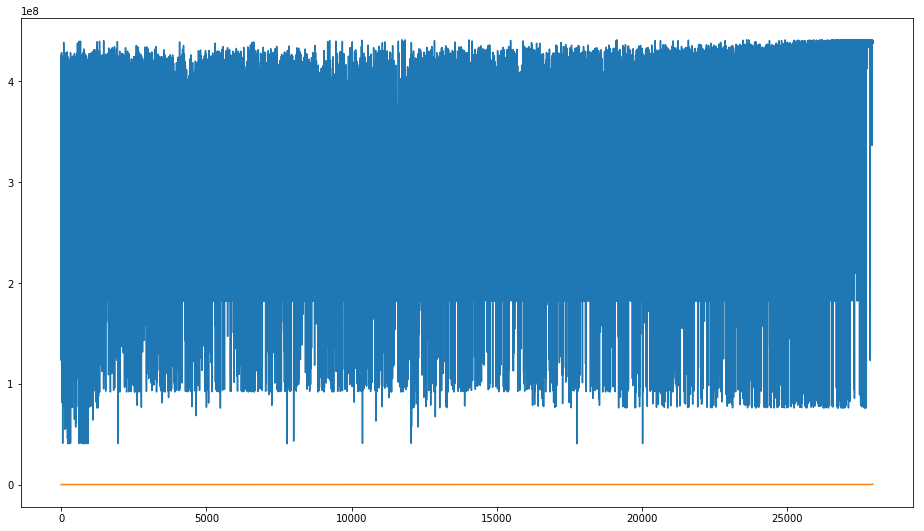

In [26]:
import operator
import matplotlib.pyplot as plt

sorted_by_value = sorted(split_train1.items(), key=lambda kv: kv[1])   #epistrefei lista

plt.figure(figsize=(16, 9))
plt.plot(sorted_by_value)
plt.show()

In [62]:
type(sorted_x)

list

In [80]:
l1 = []
for w in week[0:1]:
    for i in w[1]:
        if i not in l1:
            l1.append(i)
print(len(week[1]), len(l1))   #uparxoun dipla arthra stin prwti ebdomada

22323 20201


In [ ]:
l1

In [74]:
##### tsekarw an uparxoun kainouria arthra stin teleutaia bdomada...tlk uparxoun

tt_train = {}

for w in week[:5]:
    for i,k in zip(w[1],w[2]):     # 1:id , 2:impression
        if i not in tt_train:
            tt_train[i] = k
        else:
            temp = tt_train[i]
            temp = temp + k
            tt_train[i] = temp
            
tt_test = {}

for w in week[5:]:
     for i,k in zip(w[1],w[2]):
            if i not in tt_test and i not in tt_train:
                tt_test[i] = k
            elif i not in tt_train:
                temp = tt_test[i]
                temp = temp + k
                tt_test = temp

print(len(tt_train), len(tt_test))
   

39748 2180


In [ ]:
### to test set einai peripoy to 30% tou training set

In [106]:
import pickle

with open('training_set.pickle', 'wb') as handle:
    pickle.dump(training_set, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('test_set.pickle', 'wb') as handle:
    pickle.dump(test_set, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
#### kanw kai ena enallaktiko split se training kai test set...edw tha kratisw ola ta impressions apo thn prwth fora poy dimosieutike ena arthro

test_set2 = {}

for w in week[]:
    for i,k in zip(w[1],w[2]):
         if i not in test_set2:
                test_set2[i] = k